In [ ]:
import pandas as pd
import numpy as np
import datetime as dt 
import time 
import requests
import json
np.random.seed (42)
import scipy.stats as stats



from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as cm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.externals.six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [ ]:
"https://api.pushshift.io/reddit/search/submission/?subreddit=StarWars=500&after=30d"

In [ ]:
for x in range (21):
    
    url = "https://api.pushshift.io/reddit/search/submission/?subreddit=StarWars&size=500&after=30d".format(x)
    print(url)

In [ ]:
def query_pushshift (subreddit,kind="submission",skip=10, times=30,
                     subfield =['title', 'selftext', 'subreddit','is_self',"created_utc"]):
                                
    stem = "https://api.pushshift.io/reddit/search/{}/?subreddit={}&size=500".format(kind,subreddit)

    print(stem)
                                

In [ ]:
def query_pushshift(subreddit, kind='submission', skip=10, times=30, 
                    subfield = ['title', 'selftext', 'subreddit','is_self',"created_utc"]):

    stem = "https://api.pushshift.io/reddit/search/{}/?subreddit={}&size=500".format(kind, subreddit)
    mylist = []
    
    for x in range(1, times):
        
        URL = "{}&after={}d".format(stem, skip * x)
        print(URL)
        response = requests.get(URL)
        assert response.status_code == 200
        mine = response.json()['data']
        df = pd.DataFrame.from_dict(mine)
        mylist.append(df)
        time.sleep(2)
        
    full = pd.concat(mylist)
    
    if kind == "submission":
        
        full = full[subfield]
        
        full = full.drop_duplicates()
        
        full = full.loc[full['is_self'] == True]
        
    def get_date(created):
        return dt.date.fromtimestamp(created)
    
    _timestamp = full["created_utc"].apply(get_date)
    
    full['timestamp'] = _timestamp

    print(full.shape)
    
    return full 

In [ ]:
df = query_pushshift('StarWars')

In [ ]:
# Export to csv
df.to_csv('StarWars.csv', index=False)

In [ ]:
import pandas as pd


In [ ]:
done = pd.read_csv ('gameofthrones.csv')
dtwo = pd.read_csv ('StarWars.csv')


done = pd.DataFrame(done)
dtwo = pd.DataFrame(dtwo)

In [ ]:
#checking for dupes in datasets
print('done')
print('posts:', done.shape)
print('unique posts:', pd.DataFrame(done['title'].value_counts()).shape, '\n')


print('dtwo')
print('posts:', dtwo.shape)
print('unique posts:', pd.DataFrame(dtwo['title'].value_counts()).shape, '\n')

In [ ]:
#aggregating datasets
data1 = pd.concat([done, dtwo,], ignore_index = True)
data1.drop_duplicates(subset = 'title', inplace = True)

data1.shape 

In [ ]:
data = pd.concat([data1], ignore_index = True)
data.drop_duplicates(subset = 'selftext')
data.shape

In [ ]:
#save results to csv
data.to_csv('data.csv')
type(data)

In [ ]:
data['subreddit'].value_counts()

# Cleaning ,vectorizing and feature engineering the data set 

In [2]:
import requests
import time
import pandas as pd
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import numpy as np

/Users/Hakob/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [1]:
import pandas as pd

data = pd.read_csv('data.csv')
data = pd.DataFrame(data)
data.columns

Index(['Unnamed: 0', 'title', 'selftext', 'subreddit', 'is_self',
       'created_utc', 'timestamp'],
      dtype='object')

In [3]:
data.head(500)

,Unnamed: 0,title,selftext,subreddit,is_self,created_utc,timestamp
0,0,I'm I the only one that likes season 5?,[removed],gameofthrones,True,1535653709,2018-08-30
1,1,[Spoilers] Jon won’t take the Iron Throne whil...,"Specific to the show, Jon’s character developm...",gameofthrones,True,1535657064,2018-08-30
2,2,[Spoilers] He bent the knee,"Specific to the show, Jon’s character developm...",gameofthrones,True,1535658293,2018-08-30
3,3,Where was Gendri?,[removed],gameofthrones,True,1535658536,2018-08-30
4,4,newbie...holy shit,[removed],gameofthrones,True,1535658923,2018-08-30
5,5,[Spoiler - season 4] Newbie...holy shit!,I'm a newbie to GoT....I'm only on season 4......,gameofthrones,True,1535660773,2018-08-30
6,6,A question about the end of Season 7 (Spoilers),&gt;Spoiler prevention made for a terribly non...,gameofthrones,True,1535662080,2018-08-30
7,7,[Spoilers] A question about the Army of the De...,Question: do you think the Night King could h...,gameofthrones,True,1535662737,2018-08-30
8,8,Sam never stole Gilly's moment about the annul...,[removed],gameofthrones,True,1535665740,2018-08-30
9,9,Cersei death theory,tching YouTube videos I read a theory:\n\nRoos...,gameofthrones,True,1535669193,2018-08-30


In [4]:
to_drop = ['Unnamed: 0', 'created_utc','timestamp']
data.drop(to_drop,inplace=True,axis=1)

In [5]:
data.head()

,title,selftext,subreddit,is_self
0,I'm I the only one that likes season 5?,[removed],gameofthrones,True
1,[Spoilers] Jon won’t take the Iron Throne whil...,"Specific to the show, Jon’s character developm...",gameofthrones,True
2,[Spoilers] He bent the knee,"Specific to the show, Jon’s character developm...",gameofthrones,True
3,Where was Gendri?,[removed],gameofthrones,True
4,newbie...holy shit,[removed],gameofthrones,True


In [6]:
data[data.selftext != '[removed]']

,title,selftext,subreddit,is_self
1,[Spoilers] Jon won’t take the Iron Throne whil...,"Specific to the show, Jon’s character developm...",gameofthrones,True
2,[Spoilers] He bent the knee,"Specific to the show, Jon’s character developm...",gameofthrones,True
5,[Spoiler - season 4] Newbie...holy shit!,I'm a newbie to GoT....I'm only on season 4......,gameofthrones,True
6,A question about the end of Season 7 (Spoilers),&gt;Spoiler prevention made for a terribly non...,gameofthrones,True
7,[Spoilers] A question about the Army of the De...,Question: do you think the Night King could h...,gameofthrones,True
9,Cersei death theory,tching YouTube videos I read a theory:\n\nRoos...,gameofthrones,True
11,[SPOILER] Cersei theory S8,tching YouTube videos I read a theory:\n\nRoos...,gameofthrones,True
12,[SPOILERS] Cersei theory S8,While watching a YouTube video I read a theory...,gameofthrones,True
13,[SPOILERS] Question about Cersei's prophecy.,So the prophecy that the Witch told to Cersei ...,gameofthrones,True
16,[SPOILERS] Are you scared?,On my current rewatch of the show I've been no...,gameofthrones,True


In [7]:
data.head()

,title,selftext,subreddit,is_self
0,I'm I the only one that likes season 5?,[removed],gameofthrones,True
1,[Spoilers] Jon won’t take the Iron Throne whil...,"Specific to the show, Jon’s character developm...",gameofthrones,True
2,[Spoilers] He bent the knee,"Specific to the show, Jon’s character developm...",gameofthrones,True
3,Where was Gendri?,[removed],gameofthrones,True
4,newbie...holy shit,[removed],gameofthrones,True


In [8]:
data[data.selftext.str.contains('[removed], [deleted]') == False]

,title,selftext,subreddit,is_self
0,I'm I the only one that likes season 5?,[removed],gameofthrones,True
1,[Spoilers] Jon won’t take the Iron Throne whil...,"Specific to the show, Jon’s character developm...",gameofthrones,True
2,[Spoilers] He bent the knee,"Specific to the show, Jon’s character developm...",gameofthrones,True
3,Where was Gendri?,[removed],gameofthrones,True
4,newbie...holy shit,[removed],gameofthrones,True
5,[Spoiler - season 4] Newbie...holy shit!,I'm a newbie to GoT....I'm only on season 4......,gameofthrones,True
6,A question about the end of Season 7 (Spoilers),&gt;Spoiler prevention made for a terribly non...,gameofthrones,True
7,[Spoilers] A question about the Army of the De...,Question: do you think the Night King could h...,gameofthrones,True
8,Sam never stole Gilly's moment about the annul...,[removed],gameofthrones,True
9,Cersei death theory,tching YouTube videos I read a theory:\n\nRoos...,gameofthrones,True


In [9]:
data.head(500)

,title,selftext,subreddit,is_self
0,I'm I the only one that likes season 5?,[removed],gameofthrones,True
1,[Spoilers] Jon won’t take the Iron Throne whil...,"Specific to the show, Jon’s character developm...",gameofthrones,True
2,[Spoilers] He bent the knee,"Specific to the show, Jon’s character developm...",gameofthrones,True
3,Where was Gendri?,[removed],gameofthrones,True
4,newbie...holy shit,[removed],gameofthrones,True
5,[Spoiler - season 4] Newbie...holy shit!,I'm a newbie to GoT....I'm only on season 4......,gameofthrones,True
6,A question about the end of Season 7 (Spoilers),&gt;Spoiler prevention made for a terribly non...,gameofthrones,True
7,[Spoilers] A question about the Army of the De...,Question: do you think the Night King could h...,gameofthrones,True
8,Sam never stole Gilly's moment about the annul...,[removed],gameofthrones,True
9,Cersei death theory,tching YouTube videos I read a theory:\n\nRoos...,gameofthrones,True


In [10]:
data.dropna()

,title,selftext,subreddit,is_self
0,I'm I the only one that likes season 5?,[removed],gameofthrones,True
1,[Spoilers] Jon won’t take the Iron Throne whil...,"Specific to the show, Jon’s character developm...",gameofthrones,True
2,[Spoilers] He bent the knee,"Specific to the show, Jon’s character developm...",gameofthrones,True
3,Where was Gendri?,[removed],gameofthrones,True
4,newbie...holy shit,[removed],gameofthrones,True
5,[Spoiler - season 4] Newbie...holy shit!,I'm a newbie to GoT....I'm only on season 4......,gameofthrones,True
6,A question about the end of Season 7 (Spoilers),&gt;Spoiler prevention made for a terribly non...,gameofthrones,True
7,[Spoilers] A question about the Army of the De...,Question: do you think the Night King could h...,gameofthrones,True
8,Sam never stole Gilly's moment about the annul...,[removed],gameofthrones,True
9,Cersei death theory,tching YouTube videos I read a theory:\n\nRoos...,gameofthrones,True


In [11]:
data.to_csv('clean_data.csv', index=False)


In [12]:
X_features_df = pd.read_csv('clean_data.csv')

In [13]:
X_features_df.shape

(12549, 4)

In [14]:
X_features_df.dropna(subset=['selftext'],inplace=True)

In [15]:
X_features_df['subreddit_boolean'] = X_features_df['subreddit'] == 'gameofthrones'


In [17]:
X_features_df.head()

,title,selftext,subreddit,is_self,subreddit_boolean
0,I'm I the only one that likes season 5?,[removed],gameofthrones,True,True
1,[Spoilers] Jon won’t take the Iron Throne whil...,"Specific to the show, Jon’s character developm...",gameofthrones,True,True
2,[Spoilers] He bent the knee,"Specific to the show, Jon’s character developm...",gameofthrones,True,True
3,Where was Gendri?,[removed],gameofthrones,True,True
4,newbie...holy shit,[removed],gameofthrones,True,True


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
X_features_df.groupby('subreddit_boolean').count()

,title,selftext,subreddit,is_self
subreddit_boolean,,,,
False,5698,5698,5698,5698
True,5578,5578,5578,5578


True = gameofthrones

False = StarWars

# NLP and Building Classification models
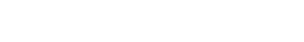
Useing TfidfVectorizer from scikit-learn to create features from the thread coments and descriptions (NOTE: Not all threads have a description) Examining  using count or binary features in the model Re-evaluate your models using these. Does this improve the model performance? What text features are the most valuable?

In [30]:
X = X_features_df['selftext']
y = X_features_df['subreddit']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
y_train_boolean = y_train == 'gameofthrones'
y_test_boolean = y_test == 'gameofthrones'

In [33]:
tvec = TfidfVectorizer(analyzer = "word",   \
                       tokenizer = None,    \
                       preprocessor = None, \
                       stop_words = None,   \
                       max_features = 10000) 

In [34]:
X_train_tv = pd.SparseDataFrame(tvec.fit_transform(X_train), columns=tvec.get_feature_names(), 
                                default_fill_value=0)
X_test_tv = pd.SparseDataFrame(tvec.transform(X_test), columns=tvec.get_feature_names(), 
                                default_fill_value=0)

In [35]:
def get_metrics(y_true, y_predict):
    matrix_def = [['tn','fp'], ['fn','tp']]
    matrix = confusion_matrix(y_true, y_predict)
    tn, fp, fn, tp = matrix.ravel()
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    misclass = 1-accuracy
    precision = tp/(tp+fp)
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    print('Matrix Definition')
    print(np.array(matrix_def))
    print('')
    print('Confusion Matrix')
    print(matrix)
    print('')
    print('METRICS')
    print(f'accuracy: {accuracy}')
    print(f'misclass: {misclass}')
    print(f'precision: {precision}')
    print(f'sensitivity: {sensitivity}')
    print(f'specificity: {specificity}')

In [36]:
logreg = LogisticRegression()

In [37]:
logreg.fit(X_train_tv, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
logreg.score(X_train_tv, y_train)

0.8365850774506326

In [39]:
logreg.score(X_test_tv, y_test)

0.820858460446967

In [40]:
get_metrics(y_test, logreg.predict(X_test_tv))

Matrix Definition
[['tn' 'fp']
 ['fn' 'tp']]

Confusion Matrix
[[1033  402]
 [ 103 1281]]

METRICS
accuracy: 0.820858460446967
misclass: 0.17914153955303302
precision: 0.7611408199643493
sensitivity: 0.9255780346820809
specificity: 0.7198606271777004



Logistic regression takes word usage data and regresses it onto sigmoid functions that divide posts into two groups, belonging to the datascience subreddit or the genetics subreddit. The logistic regression model does appear to be somewhat overfit, inferring training data with 83% accuracy while only predicting test data with 82% accuracy. That said, 82% accuracy is far better than 53%, the accuracy you would have if you just guessed that all posts from were the more common group of posts, datascience

Looking at the confusion martrix, more Star Wars posts were misclassfied as GOT posts (402 posts) than vice versa (103 posts). This bias seems to be fairly constant with this model, at least with this dataset: across a dozen random splits, the number of Star Wars posts misclassified as GOT posts always exceeded the number of GOT posts misclassified as  Star Wars posts.

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
tree = DecisionTreeClassifier()

In [43]:
tree.fit(X_train_tv, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [44]:
tree.score(X_train_tv, y_train)

0.8529029206574436

In [45]:
tree.score(X_test_tv, y_test)

0.7864490954239092

In [46]:
get_metrics(y_test, tree.predict(X_test_tv))

Matrix Definition
[['tn' 'fp']
 ['fn' 'tp']]

Confusion Matrix
[[ 973  462]
 [ 140 1244]]

METRICS
accuracy: 0.7864490954239092
misclass: 0.21355090457609083
precision: 0.7291910902696366
sensitivity: 0.8988439306358381
specificity: 0.6780487804878049


Of the various models I tried in this project, decision tree was the most overfit and least accurate. When run on training data, this model was 85% accurate, however this accuracy fell to 78% on test data. This model made more errors misclassifying 

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier()

In [49]:
rf.fit(X_train_tv, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
rf.score(X_train_tv, y_train)

0.8499467896417169

In [51]:
rf.score(X_test_tv, y_test)

0.7928343384178786

In [52]:
get_metrics(y_test, rf.predict(X_test_tv))

Matrix Definition
[['tn' 'fp']
 ['fn' 'tp']]

Confusion Matrix
[[1026  409]
 [ 175 1209]]

METRICS
accuracy: 0.7928343384178786
misclass: 0.20716566158212135
precision: 0.7472187886279357
sensitivity: 0.8735549132947977
specificity: 0.7149825783972126


there was little or no difference between decision tree and random forests. The train data accuracy fell an infinitesmal amount, from 85% to 84%, and the test data accuracy increased slightly, from 78% to 79%. The errors tended to be greater across random splits misclassifying 

In [53]:
from sklearn.ensemble import AdaBoostClassifier

In [54]:
ada = AdaBoostClassifier()

In [55]:
ada.fit(X_train_tv, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [56]:
ada.score(X_train_tv, y_train)

0.8040676362776398

In [57]:
ada.score(X_test_tv, y_test)

0.7978006385242994

In [58]:
get_metrics(y_test, ada.predict(X_test_tv))

Matrix Definition
[['tn' 'fp']
 ['fn' 'tp']]

Confusion Matrix
[[1025  410]
 [ 160 1224]]

METRICS
accuracy: 0.7978006385242994
misclass: 0.2021993614757006
precision: 0.7490820073439413
sensitivity: 0.884393063583815
specificity: 0.7142857142857143


Adaboost seems to do a better job at controlling for overfitting, at least than random forests, decreasing the accuracy of inferring training data with 80% compared to predicting testing data with 79% accuracy.

# Bonus: Use Pipeline 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = pd.get_dummies(data['title'])
y = data['subreddit']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Ustandardization and applying all models at once
ss  = StandardScaler()

logreg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=14, random_state=42)
adb = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# making pipeline for choosing best model
pipe_logreg = Pipeline([
    ('ss', ss),
    ('logreg', logreg)
])
pipe_rf = Pipeline([
    ('ss', ss),
    ('rf', rf),
])
pipe_adb = Pipeline([
    ('ss', ss),
    ('adb', adb)
])

In [ ]:
%%time
pipes    = [ 
    pipe_logreg, 
    pipe_rf, 
    pipe_adb,
]
pipe_idx = {0: 'Logistic Regression', 
            1: 'Random Forest', 
            2: 'Adaboost'
           }

for idx, pipe in enumerate(pipes):
    pipe.fit(X_train, y_train)
    print('\nScore Train/Test: %s' % pipe_idx[idx])
    print(pipe.score(X_train, y_train))
    print(pipe.score(X_test, y_test))


# Executive Summary
After obtaining  unique posts from two subreddits (StarWars and GOT) I compared 4 basic models on their ability to distinguish between posts from the two subreddits on the basis of the words used in the posts. 75% of the data were used to train the models leaving out 25% to verify that the models were able to predict accurately. The most accurate model built was based on logistic regression (accuracy = 82%). 